In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [226]:
vocab_size = 2500
token_spam_prob_file ='SpamData/03_Testing/prob-spam.txt'
token_ham_prob_file ='SpamData/03_Testing/prob-nonspam.txt'
token_all_prob_file ='SpamData/03_Testing/prob-all-tokens.txt'
test_feature_matrix_01 = 'SpamData/03_Testing/test-feature-01.txt'
test_feature_matrix_02 = 'SpamData/03_Testing/test-feature-02.txt'
test_feature_matrix_03 = 'SpamData/03_Testing/test-feature-03.txt'
test_feature_matrix_04 = 'SpamData/03_Testing/test-feature-04.txt'
test_feature_matrix_05 = 'SpamData/03_Testing/test-feature-05.txt'
test_feature_matrix_06 = 'SpamData/03_Testing/test-feature-06.txt'
test_feature_matrix_07 = 'SpamData/03_Testing/test-feature-07.txt'
test_feature_matrix_08 = 'SpamData/03_Testing/test-feature-08.txt'
test_target_file = 'SpamData/03_Testing/test-target.txt'
# x_test_orginal_file = 'SpamData/03_Testing/orginal.txt'

In [227]:
# x_test_orginal = np.loadtxt(x_test_orginal_file, delimiter=' ')
y_test = np.loadtxt(test_target_file, delimiter=' ')
x_test_01 = np.loadtxt(test_feature_matrix_01, delimiter=' ')
x_test_02 = np.loadtxt(test_feature_matrix_02, delimiter=' ')
x_test_03 = np.loadtxt(test_feature_matrix_03, delimiter=' ')
x_test_04 = np.loadtxt(test_feature_matrix_04, delimiter=' ')
x_test_05 = np.loadtxt(test_feature_matrix_05, delimiter=' ')
x_test_06 = np.loadtxt(test_feature_matrix_06, delimiter=' ')
x_test_07 = np.loadtxt(test_feature_matrix_07, delimiter=' ')
x_test_08 = np.loadtxt(test_feature_matrix_08, delimiter=' ')
prob_token_spam = np.loadtxt(token_spam_prob_file, delimiter=' ')
prob_token_ham = np.loadtxt(token_ham_prob_file, delimiter=' ')
prob_all_tokens = np.loadtxt(token_all_prob_file, delimiter=' ')

In [228]:
 type(x_test_01)

numpy.ndarray

In [229]:
x_test_part_1 = np.concatenate((x_test_01,x_test_02),axis=0)
x_test_part_2 = np.concatenate((x_test_03,x_test_04),axis=0)
x_test_part_3 = np.concatenate((x_test_05,x_test_06),axis=0)
x_test_part_4 = np.concatenate((x_test_07,x_test_08),axis=0)
x_test_final_1 = np.concatenate((x_test_part_1,x_test_part_2),axis=0)
x_test_final_2 = np.concatenate((x_test_part_3,x_test_part_4),axis=0)
x_test = np.concatenate((x_test_final_1,x_test_final_2),axis=0)

In [230]:
# pd.DataFrame(x_test_part_1)

In [231]:
x_test.shape

(1725, 2500)

# Joint Probability
  
   ## P(AnB) = P(A) x P(B)

# Independence
##     P(Spam | Viagra) x P(Spam | Free)

#### for example in a sentence, 
#### "Hello friend, want free viagra?"

### $$P(Spam|Hello)\,\,\, \,\,\, P(Spam|Want)\,\,\, x \,\,\,P(Spam|free) \,\,\,x \,\,\, P(Spam|Viagra)$$


## Calculating the joint Probability

In [232]:
#Dot Product
a= np.array([1,2,3])
b=np.array([0,5,4])
print('a = ',a)
print('b = ',b)

a =  [1 2 3]
b =  [0 5 4]


In [233]:
# 1*0 + 2*5 + 3*4
a.dot(b)

22

In [234]:
c= np.array([[0,6],[3,0],[5,1]])
# print(c)
# [ 1*0 + 2*3 + 3*5  ,  1*6 + 2*0 + 3*1 ]
print(a.dot(c))

[21  9]


In [235]:
#Finding Dot product between x_test and & prob_token_spam
print('x_test shape',x_test.shape)
print('prob token spam shape',prob_token_spam.shape)
print('prob token non-spam shape',prob_token_ham.shape)

x_test shape (1725, 2500)
prob token spam shape (2500,)
prob token non-spam shape (2500,)


In [236]:
print('Shape of dot product  ',x_test.dot(prob_token_spam).shape)

Shape of dot product   (1725,)


## Set the Prior


$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [237]:
# Now using the log for calculation, for easier interpretation as the values are closer.. using log will spread them out..
# log(P(Spam | X)) - log(P(Tokens)) + log(P(Spam))

In [238]:
#We set the prior as per the knowledge from previous notebook.. where we got proability of email being spam was 0.3105
prob_spam = 0.3105

In [239]:
#Calculating the log probabilities of tokens given that the email is Spam.. (it's stored in prob_token_spam)
np.log(prob_token_spam)

array([ -4.47993685,  -5.26433558,  -4.96239915, ...,  -9.34882785,
        -9.29166943, -11.48889401])

In [240]:
np.log(prob_all_tokens)

array([-4.07344866, -4.80077808, -4.87111077, ..., -9.54598191,
       -9.6795133 , -9.5777306 ])

In [241]:
#Joint Probability in log format
joint_log_spam = x_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens)) + np.log(prob_spam)
print('shape',joint_log_spam.shape)
print('first-5  ',joint_log_spam[:5])

shape (1725,)
first-5   [20.12539996  0.87157478 18.52811916 17.22840723 20.27766966]


In [242]:
#Calculating the log probabilities that emails are nonspam given their tokens.Storing it in joint_log_ham

$$ P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))}{P(X)}$$

In [243]:
joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens))+np.log(1-prob_spam)

In [244]:
print('shape',joint_log_ham.shape)
print('first-5  ',joint_log_ham[:5])

shape (1725,)
first-5   [-59.08187658 -10.90230296 -36.35377638 -60.90135581 -53.99874972]


# Making Prediction Comparing Joint Probabilites

## <center> P(Spam|hello) x P(Spam|want) x P(Spam|free) x P(Spam|viagra) </center>

# <center> VS </center>

## <center> P(Ham|hello) x P(Ham|want) x P(Ham|free) x P(Ham|viagra) </center>

### Checking for Higher Joint Probability

$$ P(Spam \, | \, X) \, > \, P(Ham \,|\, X) $$

<center> OR </center>

$$ P(Spam \, | \, X) \, < \, P(Ham \, | \, X) $$

##### Creating The vector Prediction for $\hat y$ ... And Storing it as 'prediction'

In [245]:
prediction = joint_log_spam > joint_log_ham
prediction [-5:]

array([False, False, False, False, False])

In [246]:
# Boolean to integers -> 
prediction[-5:]*1

array([0, 0, 0, 0, 0])

## Simplifying

In [247]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)) + np.log(prob_spam)
joint_log_ham = x_test.dot(np.log(prob_token_ham)) + np.log(1-prob_spam)

$$ P(X\,|\,Spam)\,P(Spam) \,≠\, \frac{P(X\,|\,Spam)\,P(Spam)}{P(X)}$$

# Model Evaluation

### Accuracy

In [248]:
correct_docs =(y_test == prediction).sum()
print('Docs classified correctly',correct_docs)

Docs classified correctly 1677


In [249]:
incorrect_docs = x_test.shape[0]-correct_docs
print('Docs classified incorrectly',incorrect_docs)

Docs classified incorrectly 48


In [250]:
#Accuracy percentage
fraction_wrong = incorrect_docs/len(x_test)
print('incorrect is  {:.2%}'.format(fraction_wrong))
print('correct is {:.2%}'.format(1-fraction_wrong))

incorrect is  2.78%
correct is 97.22%


# Visualizing the Decision Boundary

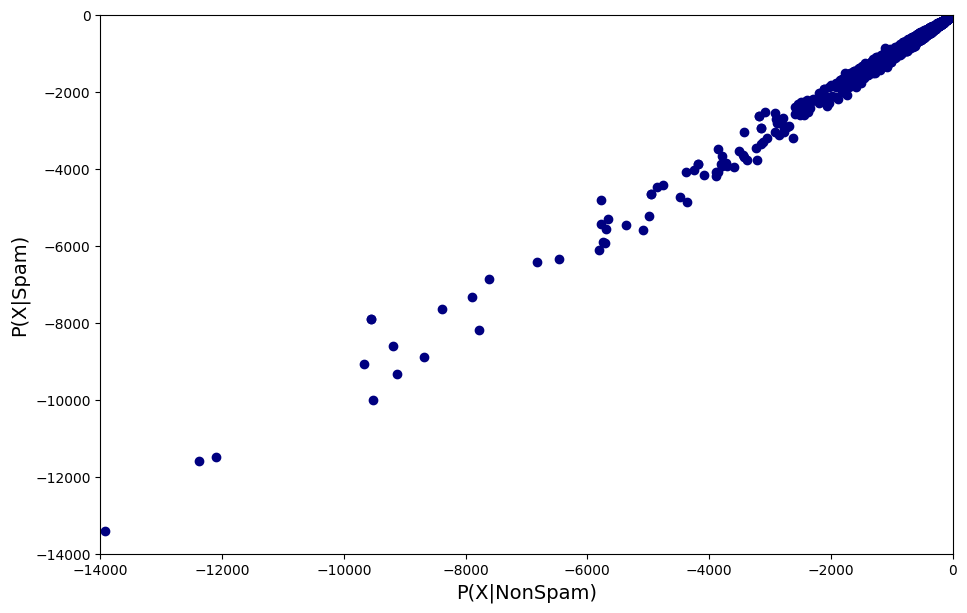

In [251]:
#Chart styling info
linedata = np.linspace(start=-14000,stop=1,num=1000)
yaxis_label ='P(X|Spam)'
xaxis_label ='P(X|NonSpam)'
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color="navy")
plt.show()

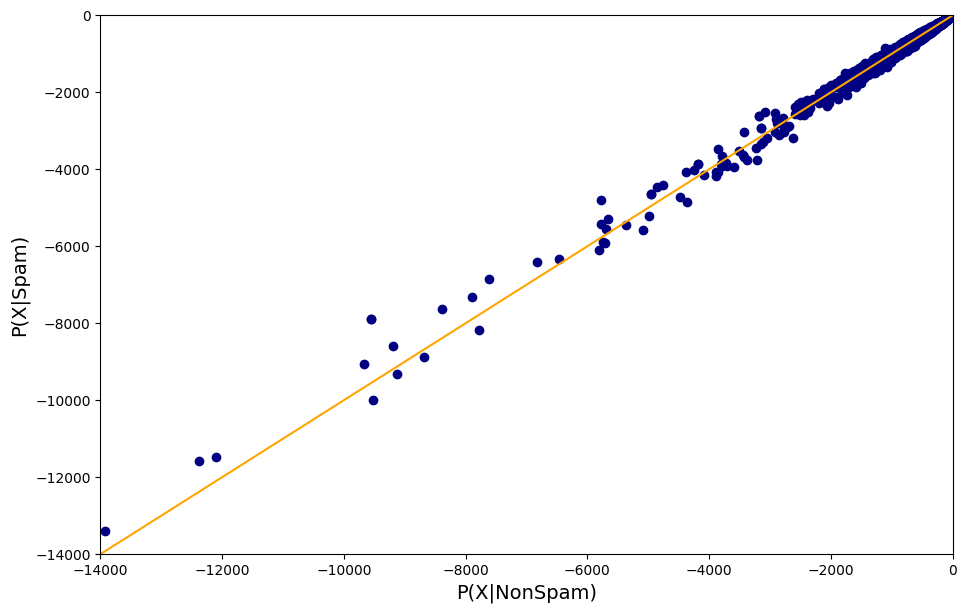

In [252]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color="navy")
plt.plot(linedata,linedata,color='orange')
plt.show()

In [253]:
joint_log_spam[0]

-1224.4715787153987

In [254]:
# (joint_log_spam[2100:2500])

In [255]:
prob_all_tokens

array([1.70185958e-02, 8.22334617e-03, 7.66484670e-03, ...,
       7.14879319e-05, 6.25519405e-05, 6.92539341e-05])

In [256]:
prob_token_spam

array([1.13341289e-02, 5.17282882e-03, 6.99612294e-03, ...,
       8.70674158e-05, 9.21890285e-05, 1.02432254e-05])

In [257]:
prob_token_ham

array([2.10080932e-02, 1.03855434e-02, 8.03102064e-03, ...,
       6.60509680e-05, 4.66242127e-05, 1.20445883e-04])

In [258]:
x_test.dot(np.log(prob_token_spam))

array([-1223.30200734,  -263.27346792,  -412.74976071, ...,
       -4838.25804191,  -543.57971803,  -334.56397314])

In [259]:
np.log(prob_spam) + np.log(prob_token_spam)

array([ -5.64950823,  -6.43390696,  -6.13197053, ..., -10.51839922,
       -10.46124081, -12.65846539])

In [260]:
joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens))+np.log(1-prob_spam)

In [261]:
x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.]])